In [4]:
import sys
!conda install --yes --prefix {sys.prefix} -c anaconda seaborn
!conda install --yes --prefix {sys.prefix} -c lightsource2-tag collection
!conda install --yes --prefix {sys.prefix} -c conda-forge matplotlib

Solving environment: done

## Package Plan ##

  environment location: /Users/saha/miniforge3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h1c322ee_7          18 KB  conda-forge
    brotli-bin-1.0.9           |       h1c322ee_7          17 KB  conda-forge
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    fonttools-4.32.0           |   py39hb18efdd_0         1.6 MB  conda-forge
    freetype-2.10.4            |       h17b34a0_1         874 KB  conda-forge
    giflib-5.2.1               |       h27ca646_2          72 KB  conda-forge
    jbig-2.1                   |    h3422bc3_2003          42 KB  conda-forge
    jpeg-9e                    |       h1c322ee_1         259 KB  conda-forge
    kiwisolver-1.4.2           |   py39h2c803a9_1          60 KB  conda-forge
    lcms2-2.12    

In [4]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import pandas as pd
%matplotlib inline

In [10]:
dataset_path = 'after/ner_rel_fulltext_full_sec.json'
#dataset_path ='/Volumes/yangx/literature/machine-learning/benchmarking/Annotators/jsons/ner_rel_fulltext_A_allnsec.json'

In [11]:
data = json.load(open(dataset_path, 'r'))

In [12]:
all_rel = []
ent_count = 0
for pmcid in data:
    annotations = data[pmcid]['annotations']
    for sent in annotations:
        if sent['rel']:
            all_rel.append(sent)
        if sent['ner']:
            print(sent)
            ent_count += len(sent['ner'])

#     raise
print(ent_count)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
tags = []
print(len(all_rel))
for sent in all_rel:
    tags.append(sent['rel'])

print(Counter(tags))

1083
Counter({'YGD': 634, 'NGD': 424, 'AMB': 25})


In [14]:
data['PMC4792959']

{'annotations': [{'sid': 0,
   'sent': 'A subunit of the oligosaccharyltransferase complex is required for interspecific gametophyte recognition in Arabidopsis ',
   'section': 'TITLE',
   'ner': [[17, 42, 'oligosaccharyltransferase', 'GP'],
    [108, 119, 'Arabidopsis', 'OG']],
   'rel': None},
  {'sid': 1,
   'sent': 'Present address: Boyce-Thompson Institute for Plant Research, 533 Tower Road, Ithaca, New York 14853, USA ',
   'section': 'UNK',
   'ner': [[46, 51, 'Plant', 'OG']],
   'rel': None},
  {'sid': 2,
   'sent': 'Present address: Carnegie Institution for Science, Department of Plant Biology, 260 Panama Street, Stanford, California 94305, USA ',
   'section': 'UNK',
   'ner': [[65, 70, 'Plant', 'OG']],
   'rel': None},
  {'sid': 3,
   'sent': 'Species-specific gamete recognition is a key premise to ensure reproductive success and the maintenance of species boundaries. ',
   'section': 'ABS',
   'ner': None,
   'rel': None},
  {'sid': 4,
   'sent': 'During plant pollen tube (

503950
27
0.08385950987201111
3.7037037037037037


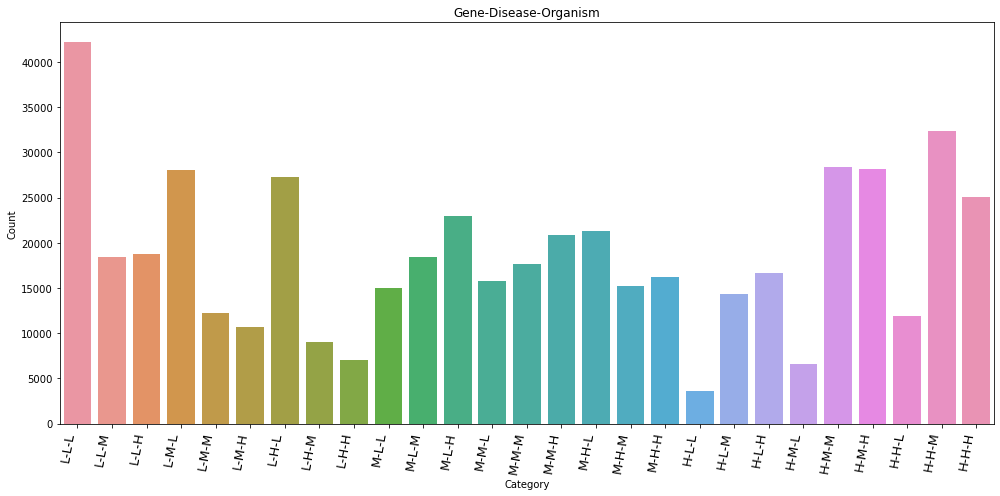

In [25]:

count = [42261,
18411,
18793,
27999,
12175,
10639,
27251,
9070,
6978,
15029,
18427,
22977,
15747,
17629,
20820,
21306,
15190,
16174,
3625,
14378,
16645,
6633,
28386,
28115,
11887,
32333,
25072]

bins = [
    'L-L-L', 'L-L-M', 'L-L-H',
    'L-M-L', 'L-M-M', 'L-M-H',
    'L-H-L', 'L-H-M', 'L-H-H',
    'M-L-L', 'M-L-M', 'M-L-H',
    'M-M-L', 'M-M-M', 'M-M-H',
    'M-H-L', 'M-H-M', 'M-H-H',
    'H-L-L', 'H-L-M', 'H-L-H',
    'H-M-L', 'H-M-M', 'H-M-H',
    'H-H-L', 'H-H-M', 'H-H-H',]

bin_dict = {'Category': bins, 'Count': count}

import seaborn as sns
import pandas as pd

bin_df = pd.DataFrame.from_dict(bin_dict)

plt.figure(figsize=(14, 7))
plt.title('Gene-Disease-Organism')
bin_fig = sns.barplot(data=bin_df, x='Category', y='Count')
bin_fig.set_xticklabels(labels=bin_fig.get_xticklabels(), rotation=80, ha='right', size=13)
plt.tight_layout()
plt.savefig('bins.pdf')
print(sum(count))
print(len(count))
print(count[0]/sum(count))
print(100/27)

In [2]:
count_26_bins = [
18411,
18793,
27999,
12175,
10639,
27251,
9070,
6978,
15029,
18427,
22977,
15747,
17629,
20820,
21306,
15190,
16174,
3625,
14378,
16645,
6633,
28386,
28115,
11887,
32333,
25072]

print(sum(count_26_bins))
len(count_26_bins)

461689


26

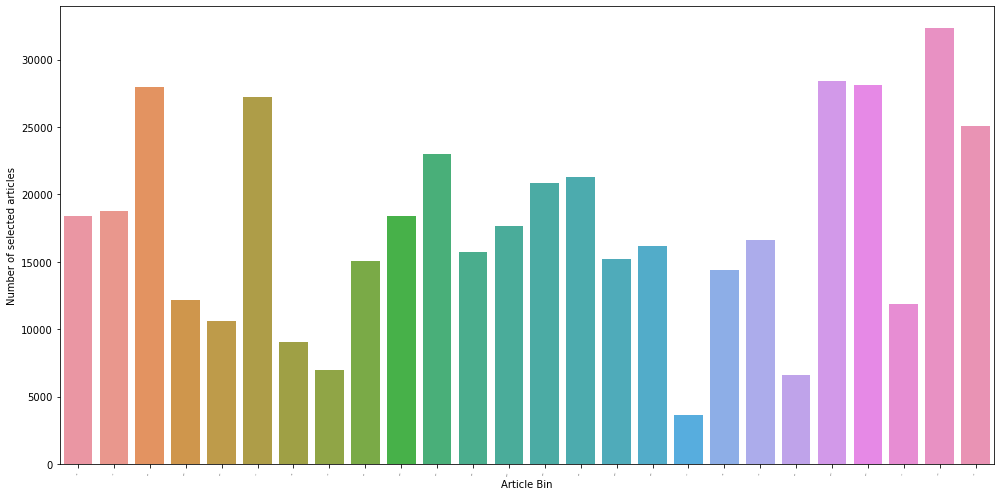

In [5]:
bins = [
    'L-L-M', 'L-L-H',
    'L-M-L', 'L-M-M', 'L-M-H',
    'L-H-L', 'L-H-M', 'L-H-H',
    'M-L-L', 'M-L-M', 'M-L-H',
    'M-M-L', 'M-M-M', 'M-M-H',
    'M-H-L', 'M-H-M', 'M-H-H',
    'H-L-L', 'H-L-M', 'H-L-H',
    'H-M-L', 'H-M-M', 'H-M-H',
    'H-H-L', 'H-H-M', 'H-H-H',]

bin_dict = {'Article Bin': bins, 'Number of selected articles': count_26_bins}

bin_df = pd.DataFrame.from_dict(bin_dict)

plt.figure(figsize=(14, 7))
#plt.title('Gene-Disease-Organism')
bin_fig = sns.barplot(data=bin_df, x='Article Bin', y='Number of selected articles')
bin_fig.set_xticklabels(labels=bin_fig.get_xticklabels(), rotation=80, ha='right', size=1)
plt.tight_layout()
plt.savefig('selected_articles_bins-distribution.png')

      A     B     C
A  1.00  0.92  0.93
B  0.92  1.00  0.99
C  0.93  0.99  1.00


Text(0.5, 1, 'Inter-Annotator Agreement')

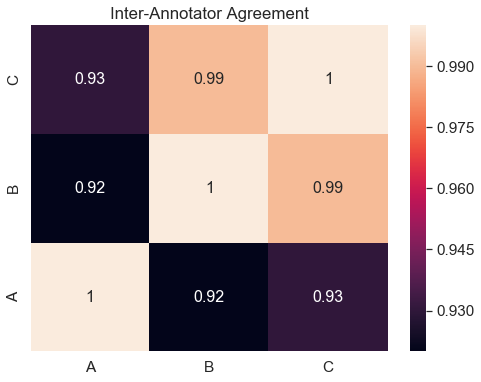

In [87]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

array = [[1,0.92, 0.93],
        [0.92, 1, 0.99],
        [0.93, 0.99, 1]]

df_cm = pd.DataFrame(array, [c for c in 'ABC'], [c for c in 'ABC'])
print(df_cm)
fig, ax = plt.subplots(figsize=(8,6))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
ax.set_ylim([0,3])
plt.title('Inter-Annotator Agreement')


Matplotlib is building the font cache using fc-list. This may take a moment.


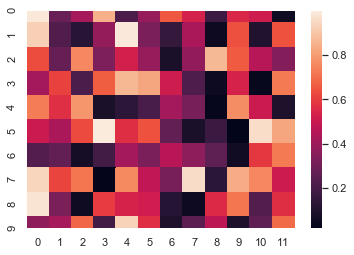

In [80]:
sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [98]:
ner_count_section = defaultdict(list)
data_dict = defaultdict(list)
for pmcid in data:
    for anno in data[pmcid]['annotations']:
        sec = anno['section']
        if anno['ner']:
            ners = anno['ner']
            for _,_,text,tag in ners:
                data_dict['pmcid'].append(pmcid)
                data_dict['section'].append(sec)
                data_dict['text'].append(text)
                data_dict['tag'].append(tag)
                ner_count_section[sec].append((text,tag))

In [107]:
pmcs_no_annotations = set()

for pmcid in data:
    if pmcid not in set(data_dict['pmcid']):
        pmcs_no_annotations.add(pmcid)
        
print("pmcids with no annotations")
print(len(pmcs_no_annotations))
print(pmcs_no_annotations)

pmcids with no annotations
8
{'PMC5462825', 'PMC4901335', 'PMC5078810', 'PMC4964887', 'PMC2664782', 'PMC2761781', 'PMC4976205', 'PMC3291930'}


In [18]:
len(ner_count_section),len(data_dict)

(17, 4)

In [8]:
[key for key in ner_count_section]

['TITLE',
 'UNK',
 'ABS',
 'RESULTS',
 'DISCUSS',
 'METHODS',
 'TABLE',
 'FIG',
 'INTRO',
 'CONCL',
 'APPENDIX',
 'SUPPL',
 'DISCUSS,CONCL',
 'RESULTS,DISCUSS',
 'ABBR',
 'AUTH_CONT',
 'METHODS,RESULTS']

In [53]:
df = pd.DataFrame.from_dict(data_dict)
df_unique = df.drop_duplicates(subset=['section', 'text', 'tag'])

In [82]:
df.pmcid.unique().size

292

In [83]:
# def annotation_per_section(ner_section):
#     section_stats = {}
#     for section in ner_section:
#         section_stats[section] = {}  
#         section_anno_total = len(ner_section[section])
#         section_anno_unique = len(set(ner_section[section]))
        
#         section_stats[section]['total'] = section_anno_total
#         section_stats[section]['unique'] = section_anno_unique


#         anno_tag = defaultdict(list)
#         for text,tag in ner_section[section]:
#             anno_tag[tag].append(text)
        
#         anno_tag_count_total = {tag:len(anno_tag[tag]) for tag in anno_tag}
#         anno_tag_count_unique = {tag:len(set(anno_tag[tag])) for tag in anno_tag}
        
#         section_stats[section]['tags'] = {}
#         section_stats[section]['tags']['total'] = anno_tag_count_total
#         section_stats[section]['tags']['unique'] = anno_tag_count_unique
    
#     print(json.dumps(section_stats, indent=2))

  
def annotation_per_section(ner_df):    
    g = sns.catplot(x="section", hue="tag", kind="count", height=12, data=ner_df);
    g.set_xticklabels(rotation=45, ha='right')
    plt.show()
        

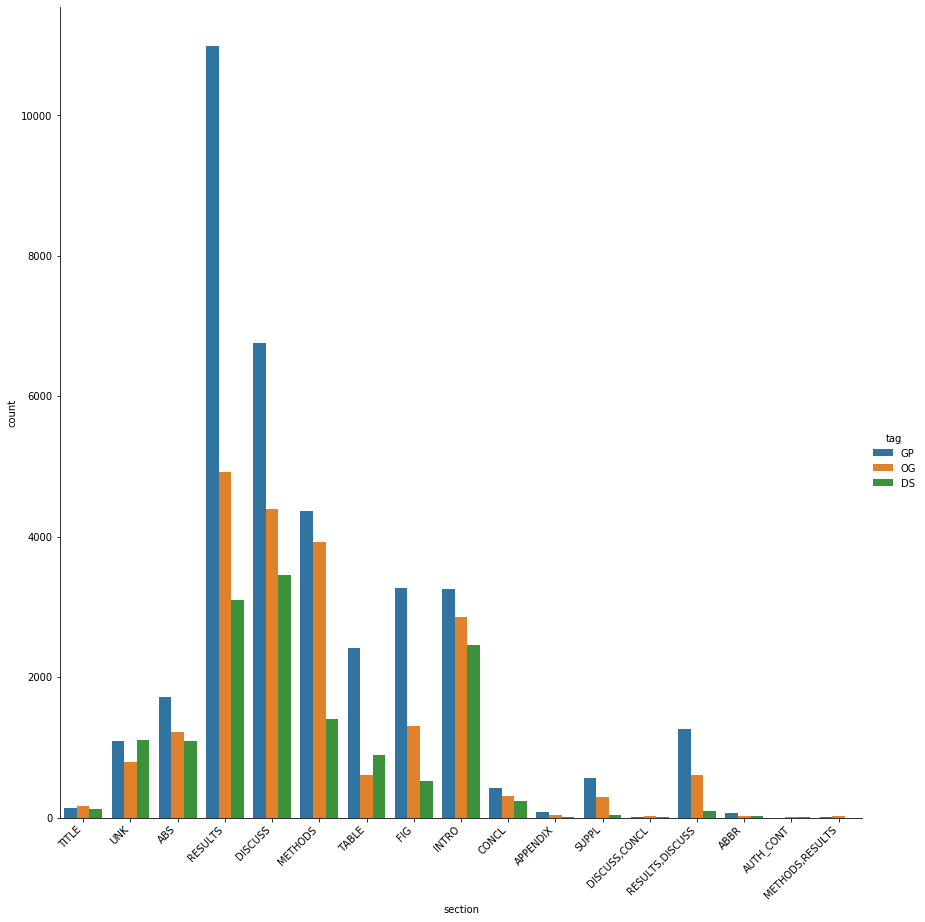

In [73]:
annotation_per_section(df)

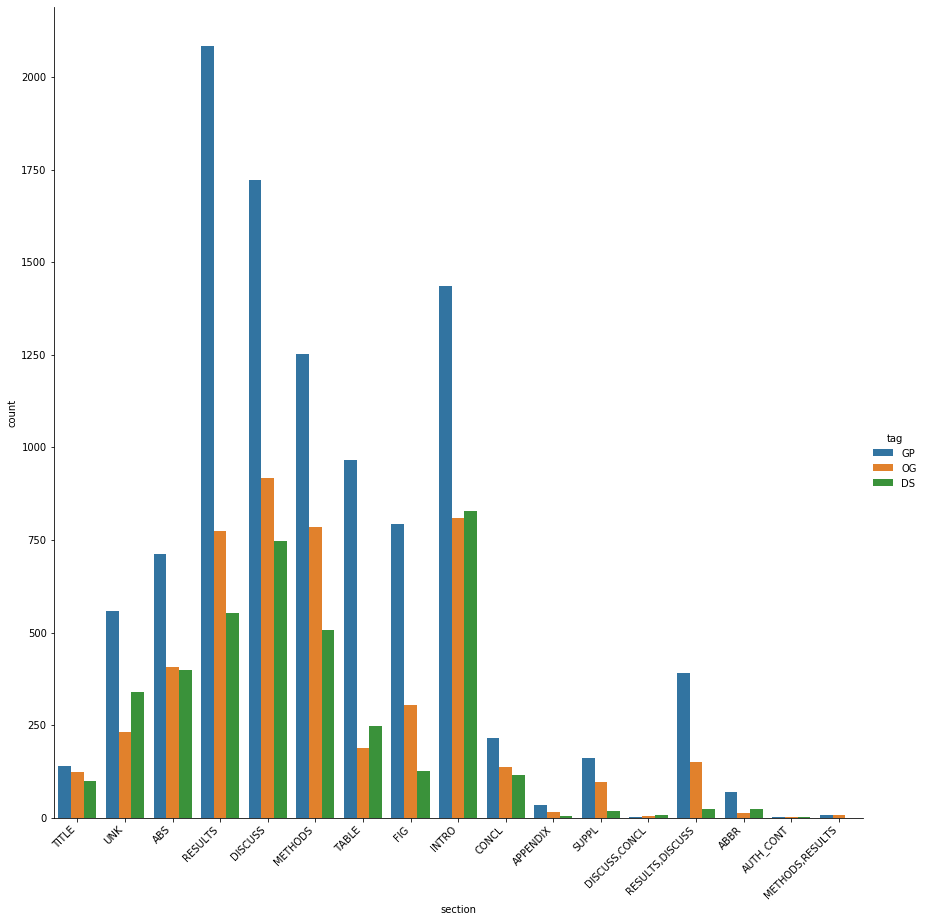

In [74]:
annotation_per_section(df_unique)

In [95]:
def annotation_per_pmcid(ner_df):
    plt.figure(figsize=(15,8))
    sns.distplot(ner_df['pmcid'].value_counts(), kde=False, bins=30)
    plt.show()

292


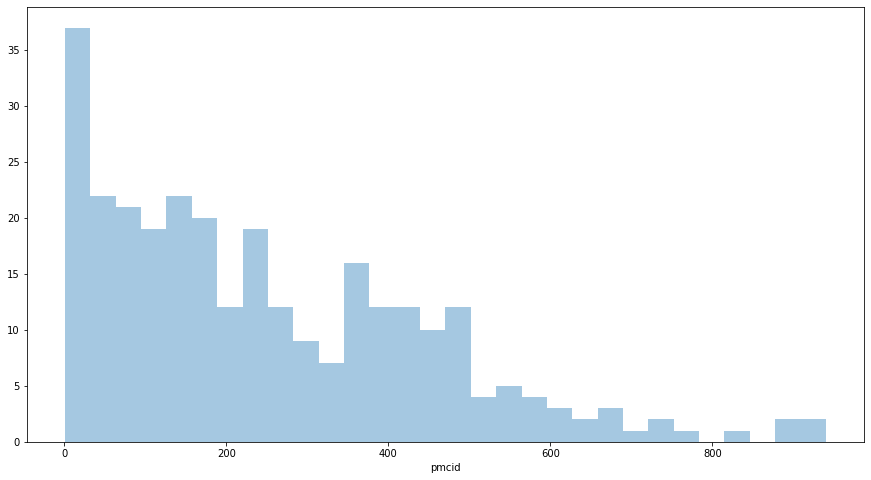

In [96]:
annotation_per_pmcid(df)

287


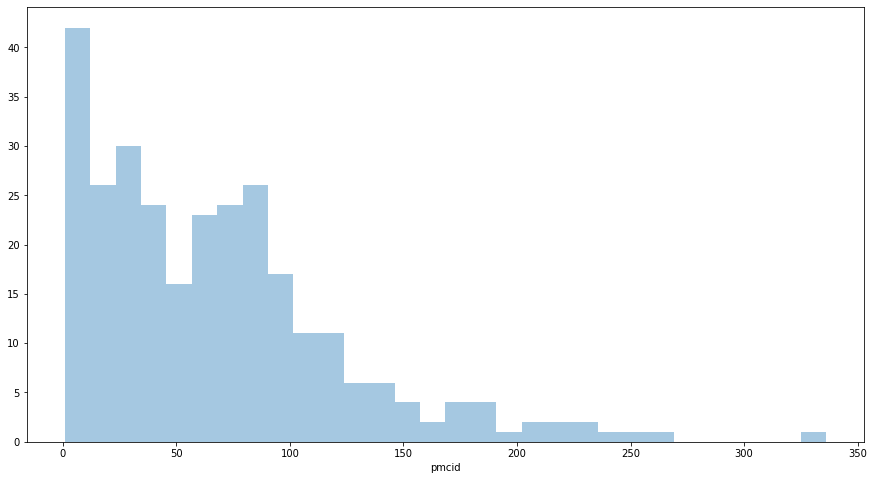

In [112]:
annotation_per_pmcid(df_unique)

In [108]:
def annotation_per_pmcid_tag(ner_df, tag):
    plt.figure(figsize=(15,8))
    tag_df = ner_df[ner_df.tag==tag]
    sns.distplot(tag_df['pmcid'].value_counts(), kde=False, bins=30)
    plt.show()

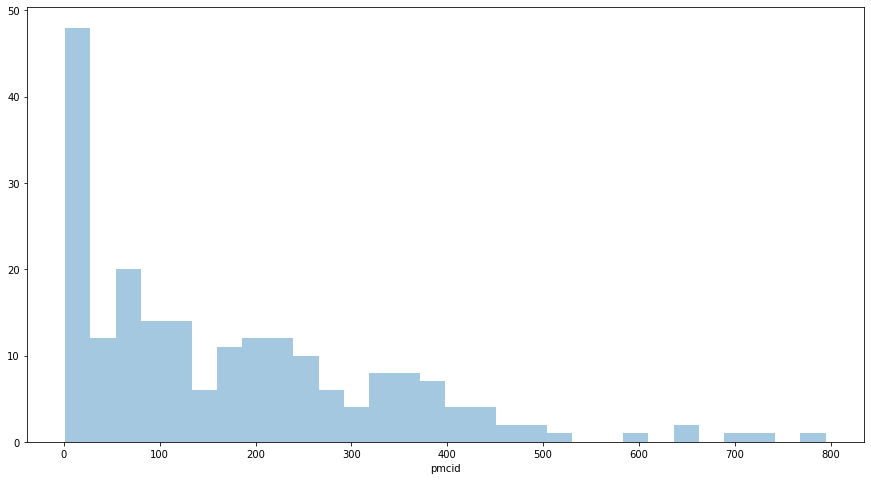

In [109]:
annotation_per_pmcid_tag(df, tag='GP')

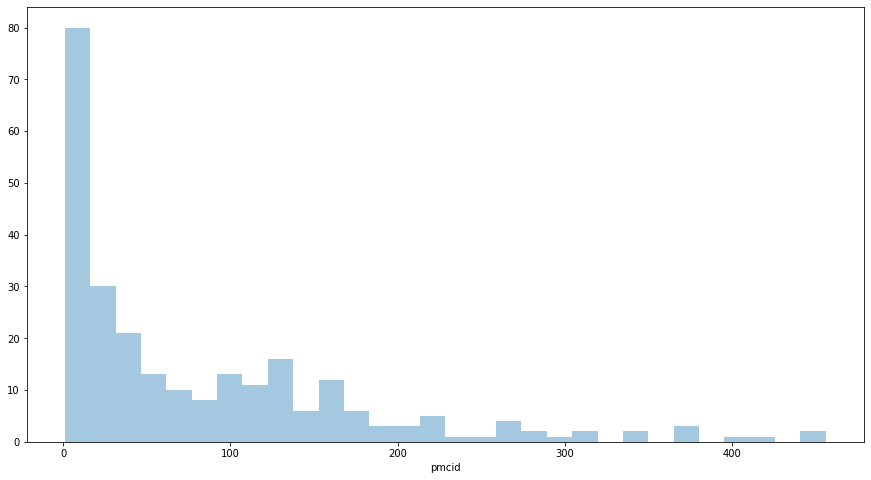

In [110]:
annotation_per_pmcid_tag(df, tag='OG')

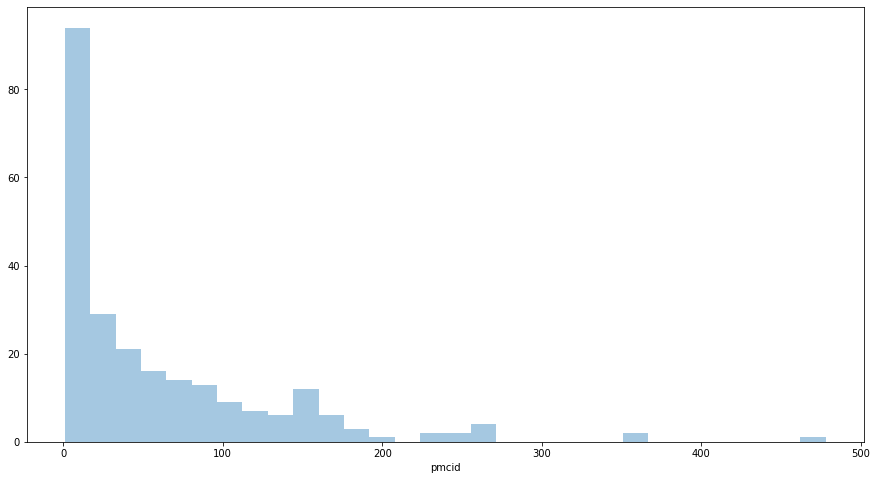

In [111]:
annotation_per_pmcid_tag(df, tag='DS')

### Hypo missed patterns

In [130]:
# missed_df  = pd.read_csv('missed_patterns.csv')

In [131]:
# missed_df[:5]

In [132]:
# len(missed_df), len(missed_df[missed_df.annotator=='GROUP0']), len(missed_df[missed_df.annotator=='GROUP1']), len(missed_df[missed_df.annotator=='GROUP2'])

In [10]:
anno_df_all = pd.read_csv('missed_patterns_all.csv')

In [3]:
len(anno_df_all), len(anno_df_all[anno_df_all.annotator=='GROUP0']), len(anno_df_all[anno_df_all.annotator=='GROUP1']), len(anno_df_all[anno_df_all.annotator=='GROUP2'])

(57995, 19344, 19326, 19325)

In [135]:
len(anno_df_all[anno_df_all.matched=='no']), len(anno_df_all[(anno_df_all.matched=='no') & (anno_df_all.annotator=='GROUP0')]), len(anno_df_all[(anno_df_all.matched=='no') & (anno_df_all.annotator=='GROUP1')]), len(anno_df_all[(anno_df_all.matched=='no') & (anno_df_all.annotator=='GROUP2')])

(3090, 1034, 1027, 1029)

In [136]:
missed_df= anno_df_all[anno_df_all.matched=='no']

In [138]:
len(missed_df), len(missed_df[missed_df.annotator=='GROUP0']), len(missed_df[missed_df.annotator=='GROUP1']), len(missed_df[missed_df.annotator=='GROUP2'])

(3090, 1034, 1027, 1029)

In [141]:
missed_gp0_df = missed_df[missed_df.annotator=='GROUP0']
missed_gp1_df = missed_df[missed_df.annotator=='GROUP1']
missed_gp2_df = missed_df[missed_df.annotator=='GROUP2']

In [146]:
missed_gp0_df[:50]

pmcid annotator                            prefix  \
140   PMC4789058    GROUP0   9.058.11.528.61.51.311.886.71.5   
141   PMC4789058    GROUP0   3.237.73.941.01.13.120.278.71.1   
145   PMC4789058    GROUP0   611.34.047.916.85.424.059.216.8   
151   PMC4789058    GROUP0   16.01.59.164.47.51.526.665.97.5   
153   PMC4789058    GROUP0  nis, Trichosporon cutaneum, and    
157   PMC4789058    GROUP0   712.34.545.616.94.025.257.916.9   
162   PMC4789058    GROUP0   .42.65.138.927.45.631.141.527.4   
172   PMC4789058    GROUP0   used in the present study were    
298   PMC3981893    GROUP0  inase, metformin, mitochondria,    
304   PMC3981893    GROUP0  IRT1/eNOS/p53 pathway.Keywords:    
332   PMC3981893    GROUP0  munoblotted with actin, AMPK, P-   
532   PMC2720973    GROUP0  se A+0gltACitrate synthase+0aceA   
536   PMC2720973    GROUP0  nthase A+0gltACitrate synthase+0   
539   PMC2720973    GROUP0  olismaceBMalate synthase A+0gltA   
542   PMC2720973    GROUP0  etabolismaceBMalate synthase A+0   
544   PMC2720973    GROUP0  and dicarboxylate metabolismaceB   
555   PMC2720973    GROUP0  /oxygenase large subunit+-cbbFC1   
569   PMC2720973    GROUP0  bly protein PilM0-Cell division/   
573   PMC2720973    GROUP0  -accepting chemotaxis protein0-/   
576   PMC2720973    GROUP0  F0-Twitching/motility/secretion/   
580   PMC2720973    GROUP0  2Enolase0-Thiosulfate oxydation/   
581   PMC2720973    GROUP0  ansferase+-Protein synthesisfusA   
585   PMC2720973    GROUP0  ntermedia, T. perometabolis and    
588   PMC2720973    GROUP0  se subunit A+-RNA degradationpnp   
590   PMC2720973    GROUP0  ing, supercoiling, inversiongyrA   
594   PMC2720973    GROUP0  uctose-1,6-bisphosphatase+0cbbA1   
602   PMC2720973    GROUP0  ing/motility/secretion/Putative    
604   PMC2720973    GROUP0  a chaperonin+0Other stressesahpF   
606   PMC2720973    GROUP0  arbon metabolismCalvin CyclerbcL   
614   PMC2720973    GROUP0  erase+0General stressgroLGroEL,    
620   PMC2720973    GROUP0  +High temperature resistancehldD   
621   PMC2720973    GROUP0  sB30S ribosomal protein S2+0rpsA   
623   PMC2720973    GROUP0   able to oxidise As(III), while    
626   PMC2720973    GROUP0  s these genes were repressed in    
629   PMC2720973    GROUP0   proteinsArsenic resistancearsA2   
633   PMC2720973    GROUP0  ehydrogenase E3 component)+0eno2   
635   PMC2720973    GROUP0  te dehydrogenase E3 component)+0   
636   PMC2720973    GROUP0  +0tufAElongation factor Tu+0rpsB   
638   PMC2720973    GROUP0  osphoenolpyruvate synthase+-aceE   
644   PMC2720973    GROUP0  Elongation factor G (EF-G)+0tufA   
646   PMC2720973    GROUP0  )0+Glycolyse/gluconeogenesisppsA   
649   PMC2720973    GROUP0  were selected: T. arsenivorans,    
663   PMC2720973    GROUP0   capacities of T. arsenivorans,    
1030  PMC4914568    GROUP0  igure S1). The TaTypA gene from    
1039  PMC4914568    GROUP0  sequence amplified from cDNA of    
1044  PMC4914568    GROUP0  Fungal Pathogens, and Treatments   
1069  PMC4914568    GROUP0  , virus-induced gene silencing,    
1591  PMC4831690    GROUP0  .567Atopic status0.7730.3510.213   
1652  PMC4831690    GROUP0  40.707Streptococcus_230.3420.671   
2100  PMC3787392    GROUP0  y are being developed.Keywords:    

                                                  exact  \
140                            Saccharomyces cerevisiae   
141                             Torulaspora delbrueckii   
145                            Kluyveromyces polysporus   
151                               Trichosporum cutaneum   
153                                         Candida sp.   
157                                Rhodotorula glutinis   
162                                 Yarrowia lipolytica   
172                                Candida sp. DBM 2163   
298                            angiotensin II receptors   
304                                          AMP kinase   
332                                               AMPKα   
532                                   

### hypo disagreed annoations

In [157]:
dis_df = pd.read_csv('disagreement_ent.csv')

In [158]:
dis_df.tag.unique()

array(['GP', 'DS', 'OG'], dtype=object)

In [159]:
len(dis_df)

10955

In [161]:
dis_df[:20]

pmcid  sid                                               sent  \
0   PMC3981893    9  Beneficial effects of metformin and losartan c...   
1   PMC3981893   16  For example, in mice with heart failure induce...   
2   PMC3981893   21  AngII type 1 (AT1R) and type 2 (AT2R) G protei...   
3   PMC3981893   21  AngII type 1 (AT1R) and type 2 (AT2R) G protei...   
4   PMC3981893  112  The effect of losartan (Los), metformin (Met),...   
5   PMC3981893  134  Recent studies identified p53, a well-known tu...   
6   PMC3981893  145  Metformin prevents mitochondrial membrane depo...   
7   PMC3981893  153  Furthermore, physical interaction between p53 ...   
8   PMC3981893  162  Thus, metformin prevents depolarization of mit...   
9   PMC3981893  164  Effects of losartan (Los), metformin (Met), Nω...   
10  PMC3981893  195  Metformin is a well-known AMPK activator, and ...   
11  PMC3981893  223  A number of studies 6,43, including ours, 13 d...   
12  PMC2720973   73  The aoxAB genes encoding the arsenite oxidase ...   
13  PMC2720973   75  Positive PCR results using primers which targe...   
14  PMC2720973   76  The aoxAB genes of WJ68 were much more diverge...   
15  PMC2720973  100                                             aoxAB    
16  PMC2720973  235  Moreover, expression of a putative oxidoreduct...   
17  PMC2720973  237  The At. caldus gene encoding this THI3148-like...   
18  PMC2720973  540                                             aoxAB    
19  PMC3836741  245  More importantly, vSMCs cultured for 3 and 5 d...   

                              text        span tag  
0     permeability transition pore  (127, 155)  GP  
1   left coronary artery occlusion    (51, 81)  DS  
2                        G protein    (38, 47)  GP  
3                            AngII      (0, 5)  GP  
4                            AngII  (112, 117)  GP  
5       tumour suppressor protein,    (44, 70)  GP  
6          electron transfer chain    (75, 98)  GP  
7                        ischaemia  (196, 205)  DS  
8                              ETC    (91, 94)  GP  
9    permeability transition pores  (170, 199)  GP  
10                       ischaemia  (154, 163)  DS  
11                       ischaemia  (124, 133)  DS  
12                           aoxAB      (4, 9)  GP  
13                           aoxAB    (66, 71)  GP  
14                           aoxAB      (4, 9)  GP  
15                           aoxAB      (0, 5)  GP  
16                    THI3148-like    (51, 63)  GP  
17                    THI3148-like    (34, 46)  GP  
18                           aoxAB      (0, 5)  GP  
19                 collagen type I    (60, 75)  GP

## agreement analysis

In [1]:
import json
with open('all_match.csv', 'r') as f:
    all_match_sent = json.load(f)

In [2]:
with open('all_match2.csv', 'r') as f:
    all_match_sent2 = json.load(f)

In [3]:
all_match_sent == all_match_sent2

True

In [4]:
len(all_match_sent['PMC4866616'])

3

In [5]:
pmcid2annos = {}
ent_count = 0
rel_count = 0
for pmcid in all_match_sent:
    # print('\n' + '=========' * 5)
    # logger.debug(pmcid)
    matched_annotation = all_match_sent[pmcid]
    names_mapping = {'GROUP0': 'A', 'GROUP1': 'B', 'GROUP2': 'C'}
    doc_len = matched_annotation[0]['doc_length']

    pmcid2annos[pmcid] = {'annotations': []}
    pmcid2annos[pmcid]['doc_len'] = doc_len

    annotations = {names_mapping[matched_annotation[i]['annotator']]: matched_annotation[i]['annotation']
                   for i in range(3)}
    anno1, anno2, anno3 = annotations['A'], annotations['B'], annotations['C']
    
    for sid in anno1:
        tags = anno1[sid]
        for tag in tags:
            if tag['tag'] in ['DS', 'GP', 'OG']:
                ent_count += 1
            else:
                rel_count += 1
print(ent_count, rel_count)
        

84149 1098


In [59]:
anno1

{'1144': [{'sent': 'Furthermore, the side effects of cancer treatment, such as chemotherapy-induced peripheral neuropathy (32) or androgen deprivation therapy (e.g., possible loss of muscle mass) (33, 34) may lead to an increased risk of falls. ',
   'text': 'peripheral neuropathy',
   'span': [80, 101],
   'tag': 'DS',
   'all': False,
   'pattern': 'hemotherapy\\-induced\\ (peripheral\\ neuropathy)\\ \\(32\\)',
   'section': 'DISCUSS'},
  {'sent': 'Furthermore, the side effects of cancer treatment, such as chemotherapy-induced peripheral neuropathy (32) or androgen deprivation therapy (e.g., possible loss of muscle mass) (33, 34) may lead to an increased risk of falls. ',
   'text': 'cancer',
   'span': [33, 39],
   'tag': 'DS',
   'all': True,
   'pattern': '\\b(cancer)\\b',
   'section': 'DISCUSS'}],
 '1143': [{'sent': 'Malignancy and associated therapies have been consistently associated with bone loss (30, 31). ',
   'text': 'bone loss',
   'span': [75, 84],
   'tag': 'DS',
   'a

In [59]:
anno2

{'1144': [{'sent': 'Furthermore, the side effects of cancer treatment, such as chemotherapy-induced peripheral neuropathy (32) or androgen deprivation therapy (e.g., possible loss of muscle mass) (33, 34) may lead to an increased risk of falls. ',
   'text': 'peripheral neuropathy',
   'span': [80, 101],
   'tag': 'DS',
   'all': False,
   'pattern': 'hemotherapy\\-induced\\ (peripheral\\ neuropathy)\\ \\(32\\)',
   'section': 'DISCUSS'},
  {'sent': 'Furthermore, the side effects of cancer treatment, such as chemotherapy-induced peripheral neuropathy (32) or androgen deprivation therapy (e.g., possible loss of muscle mass) (33, 34) may lead to an increased risk of falls. ',
   'text': 'cancer',
   'span': [33, 39],
   'tag': 'DS',
   'all': True,
   'pattern': '\\b(cancer)\\b',
   'section': 'DISCUSS'}],
 '1143': [{'sent': 'Malignancy and associated therapies have been consistently associated with bone loss (30, 31). ',
   'text': 'bone loss',
   'span': [75, 84],
   'tag': 'DS',
   'a

In [43]:
for sid in range(doc_len):
    entities1 = anno1.get(sid, [])
    entities2 = anno2.get(sid, [])
    entities3 = anno3.get(sid, [])
    print(entities1)
    print(entities2)
    print(entities3)
    break

[]
[]
[]


### overall

In [50]:
import pandas as pd

In [51]:
df2 = pd.read_csv('2df.csv')

In [52]:
df3 = pd.read_csv('3df.csv')

In [53]:
df2

Unnamed: 0 annotators  total1  total2  match2  agreed_overlap  \
0             0        A,B     147     147     147               0   
1             1        A,C     147     147     147               0   
2             2        B,C     147     147     147               0   
3             3        A,B      17      17      17               0   
4             4        A,C      17      17      17               0   
..          ...        ...     ...     ...     ...             ...   
895         895        A,C      47      46      44               0   
896         896        B,C      47      46      44               0   
897         897        A,B     236     236     236               0   
898         898        A,C     236     236     236               0   
899         899        B,C     236     236     236               0   

     disagreed_overlap  only_anno1  only_anno2       pmcid  
0                    0           0           0  PMC4866616  
1                    0           0           0  PMC4866616  
2                    0           0           0  PMC4866616  
3                    0           0           0  PMC4090160  
4                    0           0           0  PMC4090160  
..                 ...         ...         ...         ...  
895                  0           1           0  PMC5457019  
896                  0           1           0  PMC5457019  
897                  0           0           0  PMC5891595  
898                  0           0           0  PMC5891595  
899                  0           0           0  PMC5891595  

[900 rows x 10 columns]

In [54]:
df2.annotators.unique()

array(['A,B', 'A,C', 'B,C'], dtype=object)

In [55]:
df2.groupby('annotators').sum()

Unnamed: 0  total1  total2  match2  agreed_overlap  \
annotators                                                       
A,B             134550   85247   74969   72896             238   
A,C             134850   85247   75013   72934             229   
B,C             135150   74969   75013   73106             151   

            disagreed_overlap  only_anno1  only_anno2  
annotators                                             
A,B                        86       10637         360  
A,C                        70       10610         385  
B,C                        46         266         318

In [26]:
df2.groupby('annotators').sum()


Unnamed: 0  total1  total2  match2  agreed_overlap  \
annotators                                                       
A,B             134550   85247   74969   72896             238   
A,C             134850   85247   75013   72934             229   
B,C             135150   74969   75013   73106             151   

            disagreed_overlap  only_anno1  only_anno2  
annotators                                             
A,B                        86       10637         360  
A,C                        70       10610         385  
B,C                        46         266         318

In [28]:
df3.groupby('annotators').sum()

Unnamed: 0  match3  total1  total2  total3
annotators                                            
A,B,C            44850   72628   85247   74969   75013

In [11]:
anno_df_all

pmcid annotator                            prefix  \
0      PMC4866616    GROUP0  sychosis or suicidal ideation),    
1      PMC4866616    GROUP0  ale). F43.2 is categorized as a    
2      PMC4866616    GROUP0   mental illness (ongoing mania,    
3      PMC4866616    GROUP0   severe mental illness (ongoing    
4      PMC4866616    GROUP0  7.4% (2)9.7% (11)SCID diagnosed    
...           ...       ...                               ...   
57990  PMC5891595    GROUP2  –1.22)0.1311.06 (0.81–1.38)0.694   
57991  PMC5891595    GROUP2   it has also been suggested that   
57992  PMC5891595    GROUP2  sease or myocardial infarction,    
57993  PMC5891595    GROUP2   and 50.6% (3,678) were females.   
57994  PMC5891595    GROUP2  (9.6)0.729607 (9.2)66 (9.9)0.592   

                      exact                            suffix     tag    all  \
0           substance abuse   and addiction or pregnancy. Mor  CRT_DS  False   
1       depressive disorder   in this table, however, it coul  CRT_DS  False   
2                 psychosis   or suicidal ideation), substanc  CRT_DS  False   
3                     mania  , psychosis or suicidal ideation  MIS_DS  False   
4      Depressive disorders   (F32.0 F32.1 F.33.1 F34.1 F43.2  CRT_DS  False   
...                     ...                               ...     ...    ...   
57990          Hypertension  0.86 (0.62–1.19)0.3700.89 (0.63–  MIS_DS   True   
57991   high blood pressure   is associated with reduced phys  CRT_DS  False   
57992   atrial fibrillation  , diabetes, hypertension, periph  CRT_DS   True   
57993       Ischemic stroke   occurred in 89.8% of cases, whi  CRT_DS   True   
57994          Hypertension  1,747 (28.5)351 (30.8)0.1181,879  CRT_DS   True   

      matched  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
57990     yes  
57991     yes  
57992     yes  
57993     yes  
57994     yes  

[57995 rows x 8 columns]

In [16]:
anno_df_all.groupby(['pmcid', 'prefix', 'exact', 'suffix']).agg({'annotator': ",".join,
                                                                'tag': ",".join})

annotator  \
pmcid      prefix                           exact          suffix                                                   
PMC1187897  (AOM/woP); 7% (95%CI 4, 9) for  AOM             with perforation (AOM/wiP); 2%                 GROUP1   
            a tympanometer (Grason Stadler  GSI             38), a voroscope (WelchAllyn Lu         GROUP0,GROUP1   
                                            GSI            38), a voroscope (WelchAllyn Lum                GROUP2   
            age. This is the time when: i)  infections     are most likely to be acute and                 GROUP2   
            date of birth, history of past  ear infections , last audiological assessment,   GROUP0,GROUP1,GROUP2   
...                                                                                                           ...   
PMC6083812 ydroxylated to the 2-OH form by  CYP2D6          [36,37]. Both imipramine and de         GROUP0,GROUP2   
           yoritsu Seiyaku (Tokyo, Japan).  Protease        inhibitor cocktail and anti-β-a         GROUP0,GROUP2   
           zed using the forced swim test ( FST            ). A single dose of imipramine (  GROUP0,GROUP1,GROUP2   
           ± 2°C) to a depth of 30 cm. The  rat             was left in the tank for 10 min  GROUP0,GROUP1,GROUP2   
           ​(Figure5).5). Comparing ZT1 and  ZT3            groups, the reduction seemed la                GROUP1   

                                                                                                              tag  
pmcid      prefix                           exact          suffix                                                  
PMC1187897  (AOM/woP); 7% (95%CI 4, 9) for  AOM             with perforation (AOM/wiP); 2%                 MIS_DS  
            a tympanometer (Grason Stadler  GSI             38), a voroscope (WelchAllyn Lu           WT_GP,WT_GP  
                                            GSI            38), a voroscope (WelchAllyn Lum                 WT_GP  
            age. This is the time when: i)  infections     are most likely to be acute and                 CRT_DS  
            date of birth, history of past  ear infections , last audiological assessment,   CRT_DS,CRT_DS,CRT_DS  
...                                                                                                           ...  
PMC6083812 ydroxylated to the 2-OH form by  CYP2D6          [36,37]. Both imipramine and de         CRT_GP,CRT_GP  
           yoritsu Seiyaku (Tokyo, Japan).  Protease        inhibitor cocktail and anti-β-a           WS_GP,WS_GP  
           zed using the forced swim test ( FST            ). A single dose of imipramine (     WT_GP,WT_GP,WT_GP  
           ± 2°C) to a depth of 30 cm. The  rat             was left in the tank for 10 min  MIS_OG,MIS_OG,MIS_OG  
           ​(Figure5).5). Comparing ZT1 and  ZT3            groups, the reduction seemed la                 WT_GP  

[27829 rows x 2 columns]

In [19]:
anno_df_all[~anno_df_all['tag'].str.contains('CRT_')].to_csv('wrong_annot.tsv', sep='\t')

In [20]:
anno_df_all[~anno_df_all['tag'].str.contains('CRT_')]['tag'].unique()

array(['MIS_DS', 'WT_GP', 'WT_DS', 'NGD', 'WT_OG', 'WS_GP', 'MIS_OG',
       'WS_OG', 'MIS_GP', 'WT_DS,GP', 'WT_GP,OG', 'WT_OG,DS', 'WS_DS',
       'WT_GP,DS', 'WS_GP,OG', 'WT_OG,GP', 'YGD', 'AMB', 'WT_DS,OG',
       'WT_GP,OG,WS', 'WT_DS,OG,WS', 'MIS_GP,ALL', 'CRt_OG',
       'WT_OG,DS,WS', 'WT_DS,GP,WS', 'WT_OG,GP,WS', 'WT_DS,ALL'],
      dtype=object)

In [21]:
anno_df_all[~anno_df_all['tag'].str.contains('CRT_')].shape

(32963, 8)

In [22]:
anno_df_all['tag'].unique()

array(['CRT_DS', 'MIS_DS', 'WT_GP', 'WT_DS', 'NGD', 'WT_OG', 'CRT_OG',
       'CRT_GP', 'WS_GP', 'MIS_OG', 'WS_OG', 'MIS_GP', 'WT_DS,GP',
       'WT_GP,OG', 'WT_OG,DS', 'WS_DS', 'WT_GP,DS', 'WS_GP,OG',
       'WT_OG,GP', 'YGD', 'AMB', 'WT_DS,OG', 'WT_GP,OG,WS', 'WT_DS,OG,WS',
       'MIS_GP,ALL', 'CRt_OG', 'CRT_GP,ALL', 'WT_OG,DS,WS', 'WT_DS,GP,WS',
       'WT_OG,GP,WS', 'WT_DS,ALL'], dtype=object)

In [176]:
all_annot = pd.read_csv('/Users/saha/europepmc-corpus/src/annotations_org_tag.tsv', sep='\t')


In [118]:
all_annot['type'].unique()
all_annot.columns

Index(['Unnamed: 0', 'pmcid', 'exact', 'type', 'db_id'], dtype='object')

In [119]:
import re
all_annot[all_annot['type'].str.contains('crt_gp', flags=re.IGNORECASE)].shape

(20832, 5)

In [120]:
all_annot[all_annot['type']=='CRT_GP'].shape
all_annot[all_annot['type']=='WT_GP'].shape
all_annot[all_annot['type'].str.contains('WT_GP,')].shape
all_annot[all_annot['type'].str.contains('WT_GP,')].shape
all_annot[all_annot['type'].str.contains('WT_GP,')].shape

(437, 5)

In [121]:
ds = all_annot[all_annot['type'].str.contains("DS")]
gp = all_annot[all_annot['type'].str.contains("GP")]
og = all_annot[all_annot['type'].str.contains("OG")]

In [122]:
gp_to_ds = gp[gp['type'].str.contains('WT_GP,DS')]
gp_to_og = gp[gp['type'].str.contains('WT_GP,OG')]
ds_to_gp = ds[ds['type'].str.contains('WT_DS,GP')]
ds_to_og = ds[ds['type'].str.contains('WT_DS,OG')]
og_to_gp = og[og['type'].str.contains('WT_OG,GP')]
og_to_ds = og[og['type'].str.contains('WT_OG,DS')]

In [123]:
print('gp_to_ds: ' + str(gp_to_ds.shape[0]))
print('gp_to_og: ' + str(gp_to_og.shape[0]))
print('ds_to_gp: ' + str(ds_to_gp.shape[0]))
print('ds_to_og: ' + str(ds_to_og.shape[0]))
print('og_to_gp: ' + str(og_to_gp.shape[0]))
print('og_to_ds: ' + str(og_to_ds.shape[0]))

gp_to_ds: 324
gp_to_og: 113
ds_to_gp: 47
ds_to_og: 18
og_to_gp: 19
og_to_ds: 110


In [109]:
gp_fp = gp[gp['type']=='WT_GP']
ds_fp = ds[ds['type']=='WT_DS']
og_fp = og[og['type']=='WT_OG']

In [124]:
print('gp_fp: ' + str(gp_fp.shape[0]))
print('ds_fp: ' + str(ds_fp.shape[0]))
print('og_fp: ' + str(og_fp.shape[0]))

gp_fp: 5735
ds_fp: 1926
og_fp: 853


In [52]:
gp[gp['type']=='MIS_GP']['exact'].str.len()

0        25
6         7
7         3
9         3
10        3
         ..
80878     3
80880     3
80882     3
80884     3
80887     4
Name: exact, Length: 13652, dtype: int64

In [125]:
gp_black = pd.read_csv('/Users/saha/gold_standard_data_analysis/gene_BlackList.txt', sep='\t', header=None)

In [126]:
print(len(gp[(gp['type']=='MIS_GP')]['exact'].unique()))
gp[(gp['type']=='MIS_GP') & (gp['exact'].isin(gp_black[0]))].groupby(['exact']).agg('count').shape

2628


(41, 4)

In [127]:
gp_black[gp_black[0]=='BSA']

0
130  BSA

In [128]:
gp[gp['exact']=='Bad']

Unnamed: 0       pmcid exact    type  db_id
3698        3698  PMC3281816   Bad  MIS_GP    NaN

In [129]:
gp_map = pd.read_csv('/Users/saha/gold_standard_data_analysis/gp_map.tsv', sep='\t')

In [130]:
gp.groupby('type').agg('count')

Unnamed: 0  pmcid  exact  db_id
type                                        
CRT_GP            20832  20832  20832      0
MIS_GP            13652  13652  13652      0
WS_GP              1819   1819   1819      0
WT_DS,GP             46     46     46      0
WT_DS,GP,WS           1      1      1      0
WT_GP              5735   5735   5735      0
WT_GP,DS            324    324    324      0
WT_GP,OG            112    112    112      0
WT_GP,OG,WS           1      1      1      0
WT_OG,GP             19     19     19      0

In [131]:
gp_count = gp[~(gp['type']=='WT_GP') & ~(gp['type']=='WT_GP,DS') & ~(gp['type']=='WT_GP,OG') & ~(gp['type']=='WT_GP,DS,WS') & ~(gp['type']=='WT_GP,OG,WS')]
ds_count = ds[~(ds['type']=='WT_DS') & ~(ds['type']=='WT_DS,GP') & ~(ds['type']=='WT_DS,OG') & ~(ds['type']=='WT_DS,GP,WS') & ~(ds['type']=='WT_DS,OG,WS')]
og_count = og[~(og['type']=='WT_OG') & ~(og['type']=='WT_OG,GP') & ~(og['type']=='WT_OG,DS') & ~(og['type']=='WT_OG,GP,WS') & ~(og['type']=='WT_OG,DS,WS')]


In [178]:
print(gp_count.shape[0])
print(len(gp_count['exact'].unique()))

print(ds_count.shape[0])
print(len(ds_count['exact'].unique()))

print(og_count.shape[0])
print(len(og_count['exact'].unique()))

reannot = {'WT_GP': 'FP', 
           'WT_DS': 'FP', 
           'WT_OG': 'FP', 
           'WT_GP,DS': 'DS', 
           'WT_GP,OG': 'OG',
           'WT_GP,DS,WS': 'DS', 
           'WT_GP,OG,WS': 'OG', 
           'CRT_GP': 'GP',
           'MIS_GP': 'GP',
           'WS_GP' : 'GP',
           'WT_DS,GP': 'GP', 
           'WT_DS,OG': 'OG',
           'WT_DS,GP,WS': 'GP', 
           'WT_DS,OG,WS': 'OG', 
           'CRT_DS': 'DS',
           'MIS_DS': 'DS',
           'WS_DS' : 'DS',
           'WT_OG,DS': 'DS', 
           'WT_OG,GP': 'GP',
           'WT_OG,DS,WS': 'DS', 
           'WT_OG,GP,WS': 'GP', 
           'CRT_OG': 'OG',
           'MIS_OG': 'OG',
           'WS_OG' : 'OG',
          }
print(all_annot)
all_annot_without_reannot = all_annot.copy()
all_annot_without_reannot['tag'] = all_annot_without_reannot['type'].map(reannot)
print(all_annot_without_reannot)
print('Total:' + str(36369+14518+21491))
print('Total from df:')
print(all_annot_without_reannot[all_annot_without_reannot['type']=='FP'])
print('Unique: ' + str(len(all_annot_without_reannot['exact'].unique())))
print(all_annot_without_reannot['type'].unique())

36369
5600
14518
2037
21491
2347
       Unnamed: 0       pmcid                      exact    type  db_id
0               0  PMC4792959  oligosaccharyltransferase  MIS_GP    NaN
1               1  PMC4792959                Arabidopsis  CRT_OG    NaN
2               2  PMC4792959                      Plant  MIS_OG    NaN
3               3  PMC4792959                      Plant  MIS_OG    NaN
4               4  PMC4792959                      plant  MIS_OG    NaN
...           ...         ...                        ...     ...    ...
80887       80887  PMC3458065                       IgGs  MIS_GP    NaN
80888       80888  PMC3458065                        HIV  CRT_OG    NaN
80889       80889  PMC3458065                        p24  CRT_GP    NaN
80890       80890  PMC3458065                        HIV  CRT_OG    NaN
80891       80891  PMC3458065                        HIV  CRT_OG    NaN

[80892 rows x 5 columns]
       Unnamed: 0       pmcid                      exact    type  db_id tag
0

In [310]:
import numpy as np
pmc_tag = all_annot_without_reannot[['pmcid','tag','exact']].groupby(['pmcid', 'tag']).agg('count')
pmc_tag[pmc_tag.index.get_level_values('tag')=='FP'] = 0

print("Overall median" + str(pmc_tag.groupby(['pmcid']).agg('sum').median()))
print(pmc_tag.groupby(['pmcid']).agg('sum'))
# pmc_tag.groupby(['pmcid']).agg('sum').to_csv('annot_distribution.tsv', sep='\t')
a_dist = pmc_tag.groupby(['pmcid']).agg('sum')
a_dist[a_dist['exact']==0].index
pmc_tag.loc[a_dist[a_dist['exact']==0].index]

all_annot_without_reannot[all_annot_without_reannot['pmcid'].isin(a_dist[a_dist['exact']==0].index)].groupby(['pmcid', 'type']).agg('count')

Overall medianexact    192.0
dtype: float64
            exact
pmcid            
PMC1187897    160
PMC1762380    305
PMC1971115    670
PMC2233677    185
PMC2268669    932
...           ...
PMC6035403    219
PMC6037156    217
PMC6069148     51
PMC6069223     17
PMC6083812    152

[300 rows x 1 columns]


Unnamed: 0  exact  db_id  tag
pmcid      type                                
PMC2664782 WT_DS           5      5      0    5
           WT_GP          24     24      0   24
PMC2761781 WT_DS           2      2      0    2
           WT_OG           1      1      0    1
PMC3291930 WT_DS           1      1      0    1
           WT_GP          10     10      0   10
           WT_OG           3      3      0    3
PMC4901335 WT_DS          15     15      0   15
           WT_GP          14     14      0   14
PMC4964887 WT_DS           4      4      0    4
           WT_GP          10     10      0   10
PMC4976205 WT_DS           1      1      0    1
           WT_GP           1      1      0    1
PMC5078810 WT_GP         134    134      0  134
PMC5462825 WT_DS          68     68      0   68
           WT_GP           4      4      0    4

In [265]:
print(pmc_tag.groupby('pmcid').agg('sum').median())
print(pmc_tag.groupby('pmcid').agg('sum').max())

gp_pmc=pmc_tag[pmc_tag.index.get_level_values('tag')=='GP']
gp_pmc = gp_pmc.reset_index(level=1, drop=True)
gp_tag_dist = pd.DataFrame(index=pmc_tag.index.get_level_values('pmcid').unique())
gp_tag_dist['exact_count'] = 0
gp_tag_dist.loc[gp_pmc.index, 'exact_count'] = gp_pmc['exact']
print(gp_tag_dist['exact_count'].median())
print(gp_tag_dist['exact_count'].max())


ds_pmc=pmc_tag[pmc_tag.index.get_level_values('tag')=='DS']
ds_pmc = ds_pmc.reset_index(level=1, drop=True)
ds_tag_dist = pd.DataFrame(index=pmc_tag.index.get_level_values('pmcid').unique())
ds_tag_dist['exact_count'] = 0
ds_tag_dist.loc[ds_pmc.index, 'exact_count'] = ds_pmc['exact']
print(ds_tag_dist['exact_count'].median())
print(ds_tag_dist['exact_count'].max())

og_pmc=pmc_tag[pmc_tag.index.get_level_values('tag')=='OG']
og_pmc = og_pmc.reset_index(level=1, drop=True)
og_tag_dist = pd.DataFrame(index=pmc_tag.index.get_level_values('pmcid').unique())
og_tag_dist['exact_count'] = 0
og_tag_dist.loc[og_pmc.index, 'exact_count'] = og_pmc['exact']
print(og_tag_dist['exact_count'].median())
print(og_tag_dist['exact_count'].max())


exact    192.0
dtype: float64
exact    940
dtype: int64
54.5
795
16.0
478
30.0
456


In [280]:
print("Correct GP: " + str(all_annot_without_reannot[all_annot_without_reannot['type']=='CRT_GP'].shape[0]))
print("Correct GP - Unique : " + str(len(all_annot_without_reannot[all_annot_without_reannot['type']=='CRT_GP']['exact'].unique())))
print("Added GP: " + str(all_annot_without_reannot[(all_annot_without_reannot['type']=='MIS_GP') | (all_annot_without_reannot['type'].str.contains(',GP'))].shape[0]))
print("Added GP - Unique: " + str(len(all_annot_without_reannot[(all_annot_without_reannot['type']=='MIS_GP') | (all_annot_without_reannot['type'].str.contains(',GP'))]['exact'].unique())))
print("Removed GP: " + str(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('WT_GP')].shape[0]))
print("Removed GP - Unique: " + str(len(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('WT_GP')]['exact'].unique())))
print("Modified GP: " + str(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('WS_GP')].shape[0]))
print("Modified GP - Unique: " + str(len(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('WS_GP')]['exact'].unique())))


Correct GP: 20832
Correct GP - Unique : 2551
Added GP: 13718
Added GP - Unique: 2671
Removed GP: 6172
Removed GP - Unique: 697
Modified GP: 1819
Modified GP - Unique: 561


In [281]:
print("Correct DS: " + str(all_annot_without_reannot[all_annot_without_reannot['type']=='CRT_DS'].shape[0]))
print("Correct DS - Unique : " + str(len(all_annot_without_reannot[all_annot_without_reannot['type']=='CRT_DS']['exact'].unique())))
print("Added DS: " + str(all_annot_without_reannot[(all_annot_without_reannot['type']=='MIS_DS') | (all_annot_without_reannot['type'].str.contains(',DS'))].shape[0]))
print("Added DS - Unique: " + str(len(all_annot_without_reannot[(all_annot_without_reannot['type']=='MIS_DS') | (all_annot_without_reannot['type'].str.contains(',DS'))]['exact'].unique())))
print("Removed DS: " + str(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('WT_DS')].shape[0]))
print("Removed DS - Unique: " + str(len(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('WT_DS')]['exact'].unique())))
print("Modified DS: " + str(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('WS_DS')].shape[0]))
print("Modified DS - Unique: " + str(len(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('WS_DS')]['exact'].unique())))


Correct DS: 7518
Correct DS - Unique : 1309
Added DS: 5836
Added DS - Unique: 575
Removed DS: 1991
Removed DS - Unique: 447
Modified DS: 1164
Modified DS - Unique: 269


In [282]:
print("Correct OG: " + str(all_annot_without_reannot[all_annot_without_reannot['type']=='CRT_OG'].shape[0]))
print("Correct OG - Unique : " + str(len(all_annot_without_reannot[all_annot_without_reannot['type']=='CRT_OG']['exact'].unique())))
print("Added OG: " + str(all_annot_without_reannot[(all_annot_without_reannot['type']=='MIS_OG') | (all_annot_without_reannot['type'].str.contains(',OG'))].shape[0]))
print("Added OG - Unique: " + str(len(all_annot_without_reannot[(all_annot_without_reannot['type']=='MIS_OG') | (all_annot_without_reannot['type'].str.contains(',OG'))]['exact'].unique())))
print("Removed OG: " + str(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('WT_OG')].shape[0]))
print("Removed OG - Unique: " + str(len(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('WT_OG')]['exact'].unique())))
print("Modified OG: " + str(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('WS_OG')].shape[0]))
print("Modified OG - Unique: " + str(len(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('WS_OG')]['exact'].unique())))


Correct OG: 15353
Correct OG - Unique : 1351
Added OG: 5307
Added OG - Unique: 820
Removed OG: 982
Removed OG - Unique: 207
Modified OG: 831
Modified OG - Unique: 311


In [287]:
print("Correct All: " + str(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('CRT_')].shape[0]))
print("Correct All - Unique : " + str(len(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('CRT_')]['exact'].unique())))
print("Added All: " + str(all_annot_without_reannot[(all_annot_without_reannot['type'].str.contains('MIS_'))].shape[0]))
print("Added All - Unique: " + str(len(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('MIS_')]['exact'].unique())))
print("Removed All: " + str(all_annot_without_reannot[(all_annot_without_reannot['type']=='WT_GP') | (all_annot_without_reannot['type']=='WT_DS') | (all_annot_without_reannot['type']=='WT_OG')].shape[0]))
print("Removed All - Unique: " + str(len(all_annot_without_reannot[(all_annot_without_reannot['type']=='WT_GP') | (all_annot_without_reannot['type']=='WT_DS') | (all_annot_without_reannot['type']=='WT_OG')]['exact'].unique())))
print("Modified All: " + str(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('WS_GP|WS_DS|WS_OG|,GP|,DS|,OG')].shape[0]))
print("Modified All - Unique: " + str(len(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('WS_GP|WS_DS|WS_OG|,GP|,DS|,OG')]['exact'].unique())))


Correct All: 43703
Correct All - Unique : 5209
Added All: 24230
Added All - Unique: 3915
Removed All: 8514
Removed All - Unique: 1201
Modified All: 4445
Modified All - Unique: 1281


# EPMC Annotation

In [292]:
print(all_annot_without_reannot['type'].unique())

print("GP: " + str(all_annot_without_reannot[(all_annot_without_reannot['type'].str.contains('_GP')) & (all_annot_without_reannot['type']!='MIS_GP')].shape[0]))
print("GP - Unique : " + str(len(all_annot_without_reannot[(all_annot_without_reannot['type'].str.contains('_GP')) & (all_annot_without_reannot['type']!='MIS_GP')]['exact'].unique())))

print("DS: " + str(all_annot_without_reannot[(all_annot_without_reannot['type'].str.contains('_DS')) & (all_annot_without_reannot['type']!='MIS_DS')].shape[0]))
print("DS - Unique : " + str(len(all_annot_without_reannot[(all_annot_without_reannot['type'].str.contains('_DS')) & (all_annot_without_reannot['type']!='MIS_DS')]['exact'].unique())))

print("OG: " + str(all_annot_without_reannot[(all_annot_without_reannot['type'].str.contains('_OG')) & (all_annot_without_reannot['type']!='MIS_OG')].shape[0]))
print("OG - Unique : " + str(len(all_annot_without_reannot[(all_annot_without_reannot['type'].str.contains('_OG')) & (all_annot_without_reannot['type']!='MIS_OG')]['exact'].unique())))


print(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('_GP')].shape)
print(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains('MIS_GP')].shape)
print(all_annot_without_reannot[all_annot_without_reannot['type'].str.contains(',GP')].shape)

['MIS_GP' 'CRT_OG' 'MIS_OG' 'CRT_GP' 'WT_DS' 'WT_OG,GP' 'WT_OG' 'WT_GP'
 'WS_OG' 'CRT_DS' 'MIS_DS' 'WS_DS' 'WS_GP' 'WT_OG,DS' 'WT_GP,OG'
 'WT_GP,DS' 'WT_DS,OG' 'WT_DS,GP' 'WT_GP,OG,WS' 'WT_DS,OG,WS'
 'WT_DS,GP,WS']
GP: 28823
GP - Unique : 3767
DS: 10673
DS - Unique : 1942
OG: 17166
OG - Unique : 1817
(42475, 6)
(13652, 6)
(66, 6)


In [ ]:
###### pmc_tag_unq = all_annot_without_reannot[['pmcid','tag','exact','type']].groupby(['pmcid', 'tag']).agg({'exact': 'nunique'})
pmc_tag_unq[pmc_tag_unq.index.get_level_values('tag')=='FP'] = 0
print(len(pmc_tag_unq.index.get_level_values('pmcid').unique()))
print(pmc_tag_unq.groupby('pmcid').agg('sum').median())
print(pmc_tag_unq.groupby('pmcid').agg('sum').max())

gp_pmc=pmc_tag_unq[pmc_tag_unq.index.get_level_values('tag')=='GP']
gp_pmc = gp_pmc.reset_index(level=1, drop=True)
gp_tag_dist = pd.DataFrame(index=pmc_tag_unq.index.get_level_values('pmcid').unique())
gp_tag_dist['exact_count'] = 0
gp_tag_dist.loc[gp_pmc.index, 'exact_count'] = gp_pmc['exact']
print(gp_tag_dist['exact_count'].median())
print(gp_tag_dist['exact_count'].max())

ds_pmc=pmc_tag_unq[pmc_tag_unq.index.get_level_values('tag')=='DS']
ds_pmc = ds_pmc.reset_index(level=1, drop=True)
ds_tag_dist = pd.DataFrame(index=pmc_tag_unq.index.get_level_values('pmcid').unique())
ds_tag_dist['exact_count'] = 0
ds_tag_dist.loc[ds_pmc.index, 'exact_count'] = ds_pmc['exact']
print(ds_tag_dist['exact_count'].median())
print(ds_tag_dist['exact_count'].max())

og_pmc=pmc_tag_unq[pmc_tag_unq.index.get_level_values('tag')=='OG']
og_pmc = og_pmc.reset_index(level=1, drop=True)
og_tag_dist = pd.DataFrame(index=pmc_tag_unq.index.get_level_values('pmcid').unique())
og_tag_dist['exact_count'] = 0
og_tag_dist.loc[og_pmc.index, 'exact_count'] = og_pmc['exact']
print(og_tag_dist['exact_count'].median())
print(og_tag_dist['exact_count'].max())


In [249]:
all_annot_reannot = pd.read_csv('/Users/saha/europepmc-corpus/src/annotations.tsv', sep='\t')
print(all_annot_reannot[(all_annot_reannot['type']=='GP') & (all_annot_reannot['pmcid']=='PMC4556948')].shape)
print(all_annot_reannot[all_annot_reannot['type']=='DS'].shape)
print(all_annot_reannot[all_annot_reannot['type']=='OG'].shape)

(178, 5)
(14546, 5)
(21514, 5)


In [293]:
# This section counts how many annotated terms normalise to a db id
# 
map_path = '/Users/saha/gold_standard_data_analysis/'
gp_file = 'gp_new_updated_map.tsv'
ds_file = 'ds_new_updated_map.tsv'
og_file = 'og_new_updated_map.tsv'

In [294]:
gp_mapped = pd.read_csv(map_path+gp_file, sep='\t')
gp_mapped[(gp_mapped['type']!='CRT_GP') & (gp_mapped['db_id'].notna())]

In [299]:
ds_mapped = pd.read_csv(map_path+ds_file, sep='\t')
ds_mapped[(ds_mapped['type']!='CRT_DS') & (ds_mapped['db_id'].notna())]

Unnamed: 0  Unnamed: 0.1       pmcid                       exact  \
58            768           768  PMC5993813  plasmodium vivax infection   
61            771           771  PMC5993813    plasmodium vivax malaria   
114          1120          1120  PMC5993813        plasmodium infection   
119          1146          1146  PMC5993813       plasmodium infections   
129          1220          1220  PMC5993813                      anemia   
...           ...           ...         ...                         ...   
14465       80081         80081  PMC4808240       chronic heart disease   
14467       80084         80084  PMC4808240               heart failure   
14469       80086         80086  PMC4808240               heart failure   
14482       80099         80099  PMC4808240               stable angina   
14492       80111         80111  PMC4808240      coronary heart disease   

           type                db_id tag  
58     WT_OG,DS                 T047  DS  
61     WT_OG,DS                 T047  DS  
114    WT_OG,DS                 T047  DS  
119    WT_OG,DS                 T047  DS  
129      MIS_DS  T047,T033,T033,T033  DS  
...         ...                  ...  ..  
14465    MIS_DS                 T047  DS  
14467    MIS_DS            T047,T047  DS  
14469    MIS_DS            T047,T047  DS  
14482    MIS_DS                 T047  DS  
14492    MIS_DS                 T047  DS  

[958 rows x 7 columns]

In [300]:
og_mapped = pd.read_csv(map_path+og_file, sep='\t')
og_mapped[(og_mapped['type']!='CRT_OG') & (og_mapped['db_id'].notna())]

Unnamed: 0  Unnamed: 0.1       pmcid  \
88            258           258  PMC4792959   
90            278           278  PMC4792959   
312          1064          1064  PMC5993813   
314          1066          1066  PMC5993813   
315          1067          1067  PMC5993813   
...           ...           ...         ...   
21432       80773         80773  PMC3458065   
21433       80774         80774  PMC3458065   
21434       80775         80775  PMC3458065   
21450       80818         80818  PMC3458065   
21465       80842         80842  PMC3458065   

                                         exact    type  \
88               E. coli strain DH5-alpha F'Iq   WS_OG   
90     Agrobacterium tumefaciens strain CV1310   WS_OG   
312                    Plasmodium berghei ANKA  MIS_OG   
314              Plasmodium cynomolgi strain B  MIS_OG   
315                  Plasmodium falciparum 3D7  MIS_OG   
...                                        ...     ...   
21432                        HIV-1 strain IIIB   WS_OG   
21433                                 HIV IIIB   WS_OG   
21434                                 HIV IIIB   WS_OG   
21450                                 HIV IIIB   WS_OG   
21465                                 HIV IIIB   WS_OG   

                               db_id tag  
88                             11086  OG  
90                               357  OG  
312                             5821  OG  
314                             5827  OG  
315                           522859  OG  
...                              ...  ..  
21432                          11676  OG  
21433  11676,11709,12721,35274,57667  OG  
21434  11676,11709,12721,35274,57667  OG  
21450  11676,11709,12721,35274,57667  OG  
21465  11676,11709,12721,35274,57667  OG  

[668 rows x 7 columns]